In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/weather-dataset/temp.csv


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import OrdinalEncoder,power_transform,StandardScaler,MinMaxScaler
from sklearn.model_selection import train_test_split,cross_val_score,GridSearchCV,KFold
from sklearn.ensemble import ExtraTreesRegressor,RandomForestRegressor
from sklearn.linear_model import LinearRegression,Lasso
from lightgbm import LGBMRegressor
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
!pip install scikit-plot
import scikitplot as skplt

# Importing the dataset

In [3]:
data=pd.read_csv("/kaggle/input/weather-dataset/temp.csv")
data

,station,Date,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,...,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin
0,1.0,30-06-2013,28.7,21.4,58.255688,91.116364,28.074101,23.006936,6.818887,69.451805,...,0.000000,0.000000,0.000000,37.6046,126.991,212.3350,2.785000,5992.895996,29.1,21.2
1,2.0,30-06-2013,31.9,21.6,52.263397,90.604721,29.850689,24.035009,5.691890,51.937448,...,0.000000,0.000000,0.000000,37.6046,127.032,44.7624,0.514100,5869.312500,30.5,22.5
2,3.0,30-06-2013,31.6,23.3,48.690479,83.973587,30.091292,24.565633,6.138224,20.573050,...,0.000000,0.000000,0.000000,37.5776,127.058,33.3068,0.266100,5863.555664,31.1,23.9
3,4.0,30-06-2013,32.0,23.4,58.239788,96.483688,29.704629,23.326177,5.650050,65.727144,...,0.000000,0.000000,0.000000,37.6450,127.022,45.7160,2.534800,5856.964844,31.7,24.3
4,5.0,30-06-2013,31.4,21.9,56.174095,90.155128,29.113934,23.486480,5.735004,107.965535,...,0.000000,0.000000,0.000000,37.5507,127.135,35.0380,0.505500,5859.552246,31.2,22.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7747,23.0,30-08-2017,23.3,17.1,26.741310,78.869858,26.352081,18.775678,6.148918,72.058294,...,0.000000,0.000000,0.000000,37.5372,126.891,15.5876,0.155400,4443.313965,28.3,18.1
7748,24.0,30-08-2017,23.3,17.7,24.040634,77.294975,27.010193,18.733519,6.542819,47.241457,...,0.000000,0.000000,0.000000,37.5237,126.909,17.2956,0.222300,4438.373535,28.6,18.8
7749,25.0,30-08-2017,23.2,17.4,22.933014,77.243744,27.939516,18.522965,7.289264,9.090034,...,0.000000,0.000000,0.000000,37.5237,126.970,19.5844,0.271300,4451.345215,27.8,17.4
7750,NaN,NaN,20.0,11.3,19.794666,58.936283,17.624954,14.272646,2.882580,-13.603212,...,0.000000,0.000000,0.000000,37.4562,126.826,12.3700,0.098475,4329.520508,17.4,11.3


In [4]:
data.shape

(7752, 25)

we dont need the date column, so drop it

In [5]:
data.head(2)

,station,Date,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,...,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin
0,1.0,30-06-2013,28.7,21.4,58.255688,91.116364,28.074101,23.006936,6.818887,69.451805,...,0.0,0.0,0.0,37.6046,126.991,212.3350,2.7850,5992.895996,29.1,21.2
1,2.0,30-06-2013,31.9,21.6,52.263397,90.604721,29.850689,24.035009,5.691890,51.937448,...,0.0,0.0,0.0,37.6046,127.032,44.7624,0.5141,5869.312500,30.5,22.5


In [6]:
data.drop_duplicates()

,station,Date,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,...,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin
0,1.0,30-06-2013,28.7,21.4,58.255688,91.116364,28.074101,23.006936,6.818887,69.451805,...,0.000000,0.000000,0.000000,37.6046,126.991,212.3350,2.785000,5992.895996,29.1,21.2
1,2.0,30-06-2013,31.9,21.6,52.263397,90.604721,29.850689,24.035009,5.691890,51.937448,...,0.000000,0.000000,0.000000,37.6046,127.032,44.7624,0.514100,5869.312500,30.5,22.5
2,3.0,30-06-2013,31.6,23.3,48.690479,83.973587,30.091292,24.565633,6.138224,20.573050,...,0.000000,0.000000,0.000000,37.5776,127.058,33.3068,0.266100,5863.555664,31.1,23.9
3,4.0,30-06-2013,32.0,23.4,58.239788,96.483688,29.704629,23.326177,5.650050,65.727144,...,0.000000,0.000000,0.000000,37.6450,127.022,45.7160,2.534800,5856.964844,31.7,24.3
4,5.0,30-06-2013,31.4,21.9,56.174095,90.155128,29.113934,23.486480,5.735004,107.965535,...,0.000000,0.000000,0.000000,37.5507,127.135,35.0380,0.505500,5859.552246,31.2,22.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7747,23.0,30-08-2017,23.3,17.1,26.741310,78.869858,26.352081,18.775678,6.148918,72.058294,...,0.000000,0.000000,0.000000,37.5372,126.891,15.5876,0.155400,4443.313965,28.3,18.1
7748,24.0,30-08-2017,23.3,17.7,24.040634,77.294975,27.010193,18.733519,6.542819,47.241457,...,0.000000,0.000000,0.000000,37.5237,126.909,17.2956,0.222300,4438.373535,28.6,18.8
7749,25.0,30-08-2017,23.2,17.4,22.933014,77.243744,27.939516,18.522965,7.289264,9.090034,...,0.000000,0.000000,0.000000,37.5237,126.970,19.5844,0.271300,4451.345215,27.8,17.4
7750,NaN,NaN,20.0,11.3,19.794666,58.936283,17.624954,14.272646,2.882580,-13.603212,...,0.000000,0.000000,0.000000,37.4562,126.826,12.3700,0.098475,4329.520508,17.4,11.3


NO duplicates present in the data

In [7]:
data.isna().sum()

station              2
Date                 2
Present_Tmax        70
Present_Tmin        70
LDAPS_RHmin         75
LDAPS_RHmax         75
LDAPS_Tmax_lapse    75
LDAPS_Tmin_lapse    75
LDAPS_WS            75
LDAPS_LH            75
LDAPS_CC1           75
LDAPS_CC2           75
LDAPS_CC3           75
LDAPS_CC4           75
LDAPS_PPT1          75
LDAPS_PPT2          75
LDAPS_PPT3          75
LDAPS_PPT4          75
lat                  0
lon                  0
DEM                  0
Slope                0
Solar radiation      0
Next_Tmax           27
Next_Tmin           27
dtype: int64

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7752 entries, 0 to 7751
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   station           7750 non-null   float64
 1   Date              7750 non-null   object 
 2   Present_Tmax      7682 non-null   float64
 3   Present_Tmin      7682 non-null   float64
 4   LDAPS_RHmin       7677 non-null   float64
 5   LDAPS_RHmax       7677 non-null   float64
 6   LDAPS_Tmax_lapse  7677 non-null   float64
 7   LDAPS_Tmin_lapse  7677 non-null   float64
 8   LDAPS_WS          7677 non-null   float64
 9   LDAPS_LH          7677 non-null   float64
 10  LDAPS_CC1         7677 non-null   float64
 11  LDAPS_CC2         7677 non-null   float64
 12  LDAPS_CC3         7677 non-null   float64
 13  LDAPS_CC4         7677 non-null   float64
 14  LDAPS_PPT1        7677 non-null   float64
 15  LDAPS_PPT2        7677 non-null   float64
 16  LDAPS_PPT3        7677 non-null   float64


The date column is of "object-type". so convert it to datetime format

In [9]:
data['Date']=pd.to_datetime(data['Date'])

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7752 entries, 0 to 7751
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   station           7750 non-null   float64       
 1   Date              7750 non-null   datetime64[ns]
 2   Present_Tmax      7682 non-null   float64       
 3   Present_Tmin      7682 non-null   float64       
 4   LDAPS_RHmin       7677 non-null   float64       
 5   LDAPS_RHmax       7677 non-null   float64       
 6   LDAPS_Tmax_lapse  7677 non-null   float64       
 7   LDAPS_Tmin_lapse  7677 non-null   float64       
 8   LDAPS_WS          7677 non-null   float64       
 9   LDAPS_LH          7677 non-null   float64       
 10  LDAPS_CC1         7677 non-null   float64       
 11  LDAPS_CC2         7677 non-null   float64       
 12  LDAPS_CC3         7677 non-null   float64       
 13  LDAPS_CC4         7677 non-null   float64       
 14  LDAPS_PPT1        7677 n

feature engineering: Splitting the date column into 3 columns - Year, Month, Date

In [11]:
data['Year']=data['Date'].dt.year
data['Month']=data['Date'].dt.month
data['Day']=data['Date'].dt.day

Delete the Date Column now.

In [12]:
data.drop(['Date'],axis=1,inplace=True)


In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7752 entries, 0 to 7751
Data columns (total 27 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   station           7750 non-null   float64
 1   Present_Tmax      7682 non-null   float64
 2   Present_Tmin      7682 non-null   float64
 3   LDAPS_RHmin       7677 non-null   float64
 4   LDAPS_RHmax       7677 non-null   float64
 5   LDAPS_Tmax_lapse  7677 non-null   float64
 6   LDAPS_Tmin_lapse  7677 non-null   float64
 7   LDAPS_WS          7677 non-null   float64
 8   LDAPS_LH          7677 non-null   float64
 9   LDAPS_CC1         7677 non-null   float64
 10  LDAPS_CC2         7677 non-null   float64
 11  LDAPS_CC3         7677 non-null   float64
 12  LDAPS_CC4         7677 non-null   float64
 13  LDAPS_PPT1        7677 non-null   float64
 14  LDAPS_PPT2        7677 non-null   float64
 15  LDAPS_PPT3        7677 non-null   float64
 16  LDAPS_PPT4        7677 non-null   float64


# Univariate Analysis

In [14]:
data.columns

Index(['station', 'Present_Tmax', 'Present_Tmin', 'LDAPS_RHmin', 'LDAPS_RHmax',
       'LDAPS_Tmax_lapse', 'LDAPS_Tmin_lapse', 'LDAPS_WS', 'LDAPS_LH',
       'LDAPS_CC1', 'LDAPS_CC2', 'LDAPS_CC3', 'LDAPS_CC4', 'LDAPS_PPT1',
       'LDAPS_PPT2', 'LDAPS_PPT3', 'LDAPS_PPT4', 'lat', 'lon', 'DEM', 'Slope',
       'Solar radiation', 'Next_Tmax', 'Next_Tmin', 'Year', 'Month', 'Day'],
      dtype='object')

In [15]:
col=['DEM','Slope','Year','Month', 'Day','station']
col

['DEM', 'Slope', 'Year', 'Month', 'Day', 'station']

Count Plot for all the descriptive variables

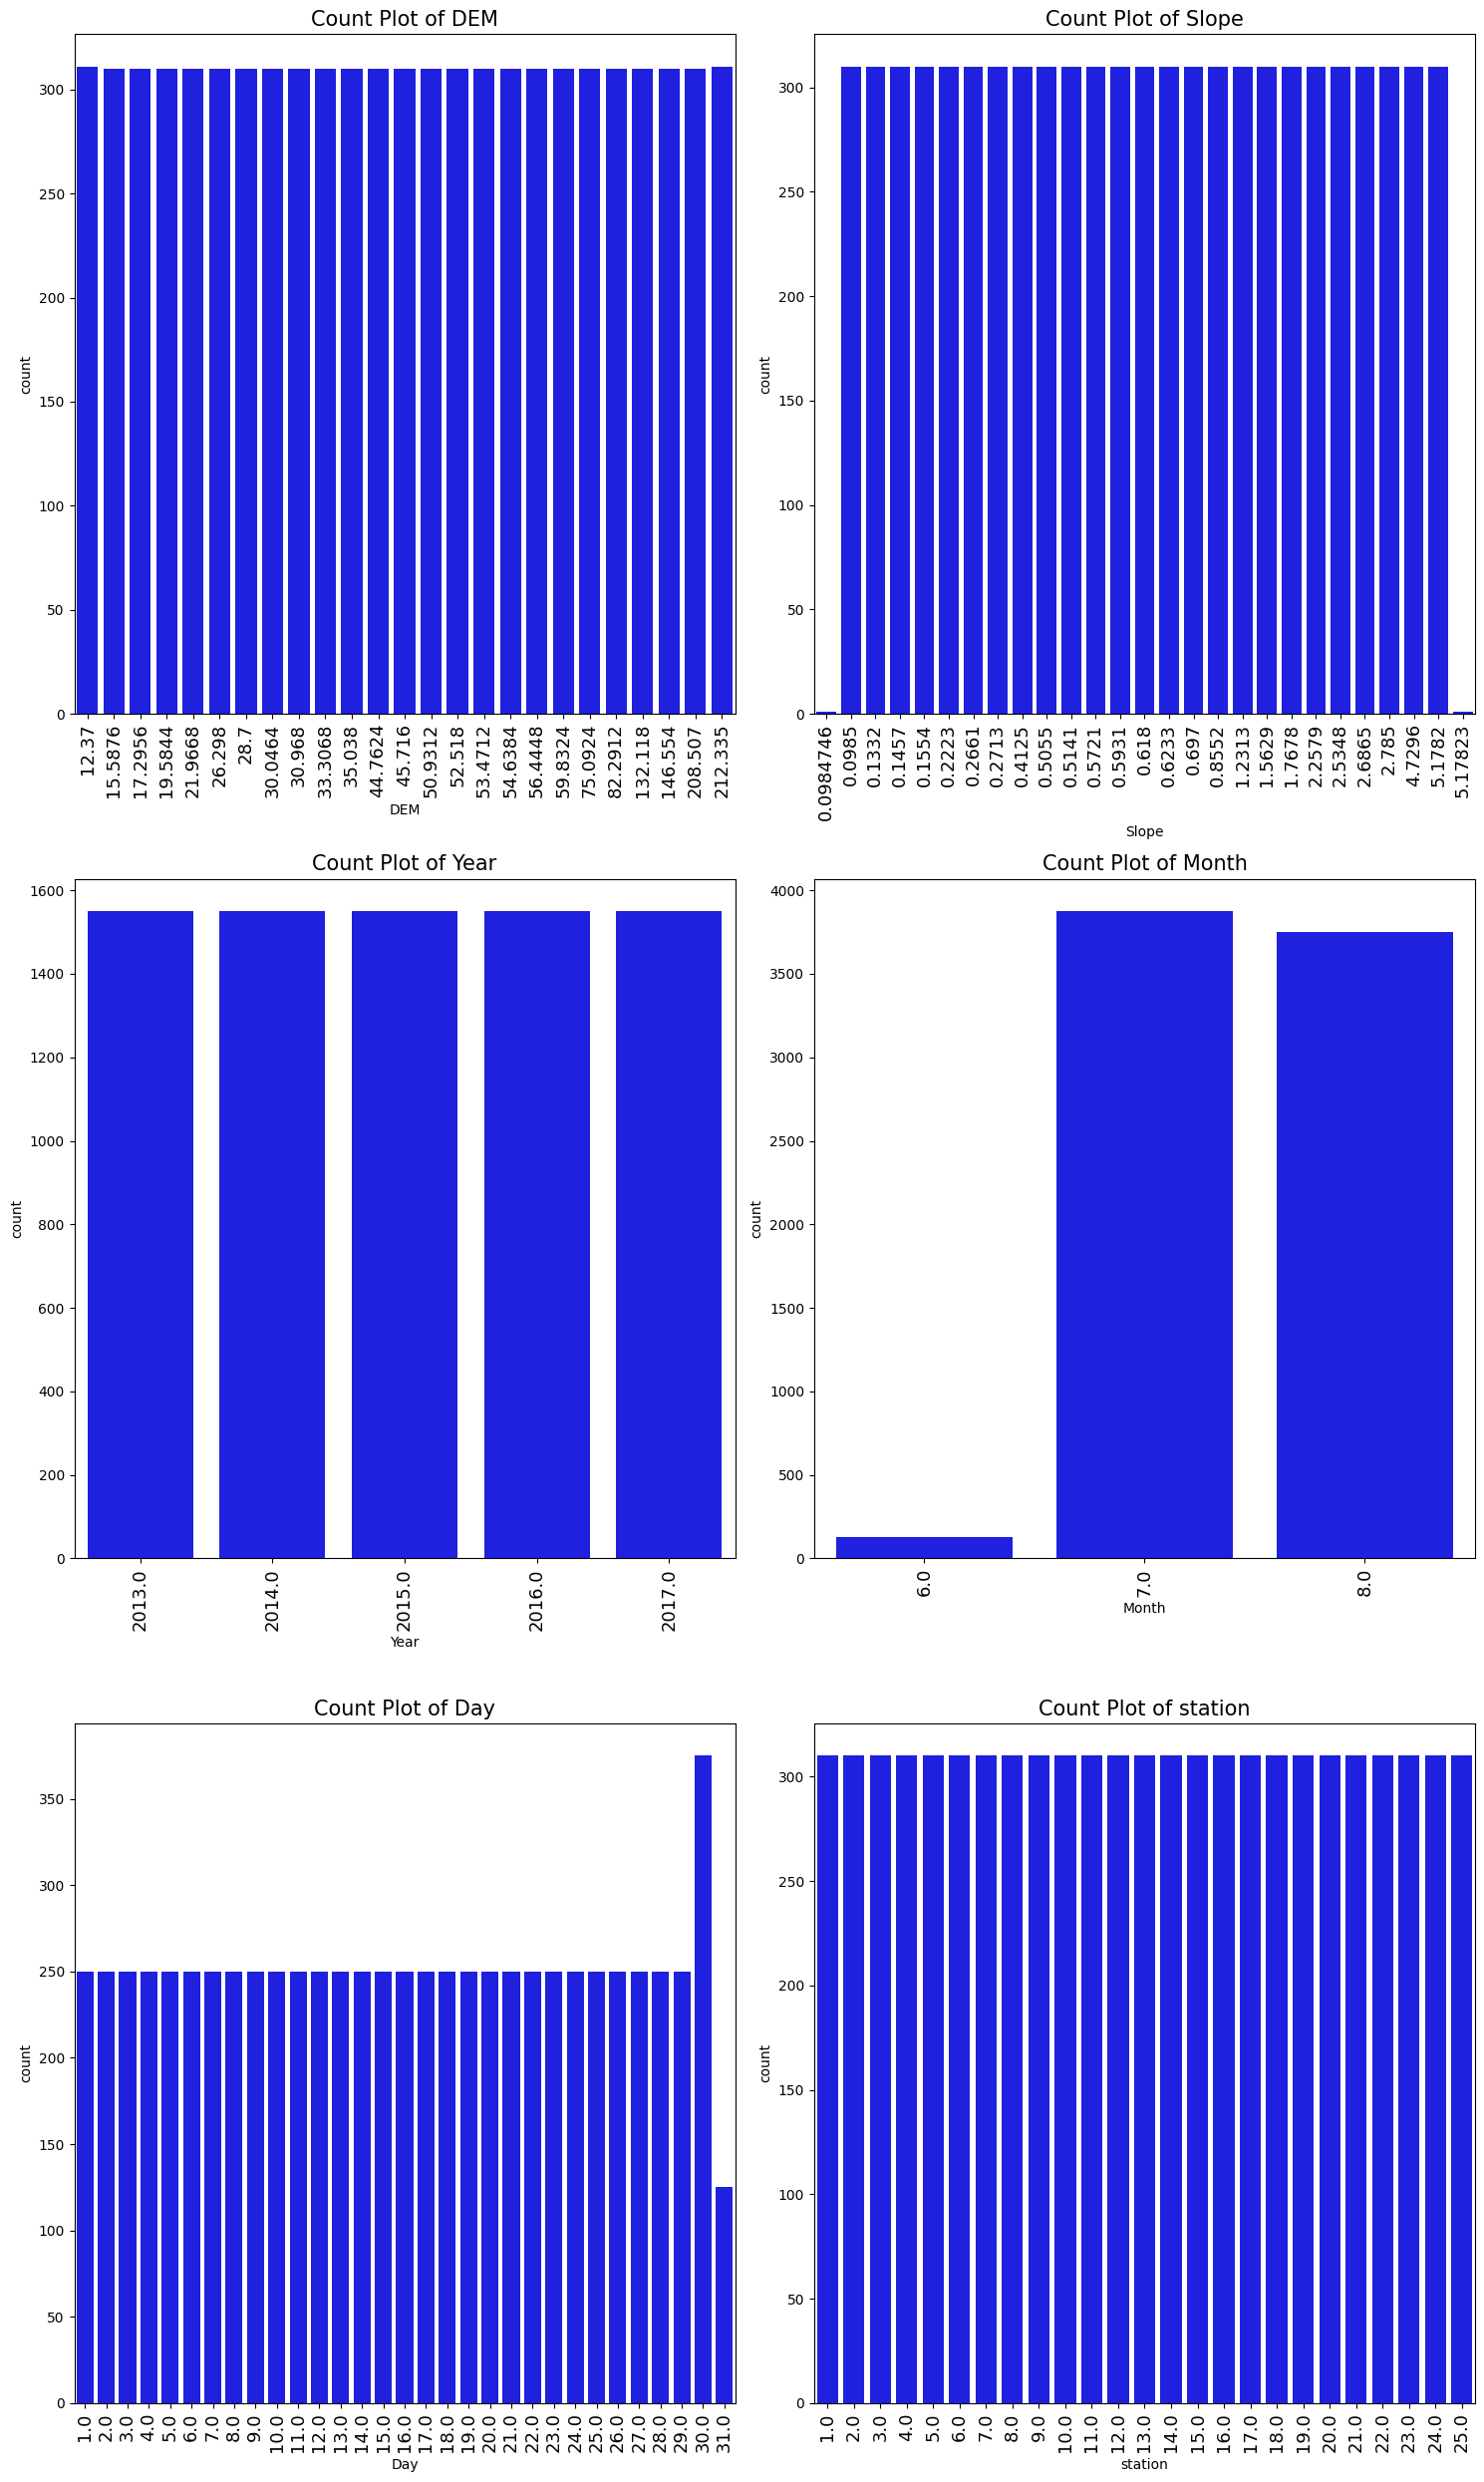

In [16]:
plt.figure(figsize=(15,25))
for i in range(len(col)):
    plt.subplot(3,2,i+1)
    sns.countplot(x=col[i],data=data,color="blue")
    plt.title(f"Count Plot of {col[i]}",fontsize=15)
    plt.xticks(rotation=90,fontsize=13)
    plt.tight_layout()

In [17]:
col1=['Present_Tmax','Present_Tmin']
col1

['Present_Tmax', 'Present_Tmin']

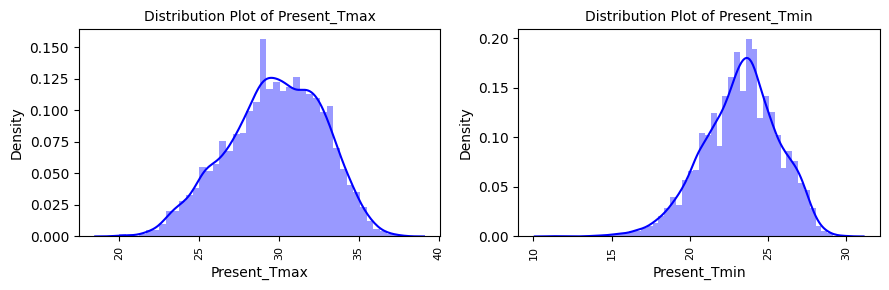

In [18]:
plt.figure(figsize=(9,3))
for i in range(len(col1)):
    plt.subplot(1,2,i+1)
    sns.distplot(data[col1[i]],color="blue")
    plt.title(f"Distribution Plot of {col1[i]}",fontsize=10)
    plt.xticks(rotation=90,fontsize=8)
    plt.tight_layout()

Displot depicted the variation in the data distributuion.
Maximum Temperature distributuin lies in the range 27-32.
Minimum Temperature distributuin lies in the range 20-27.

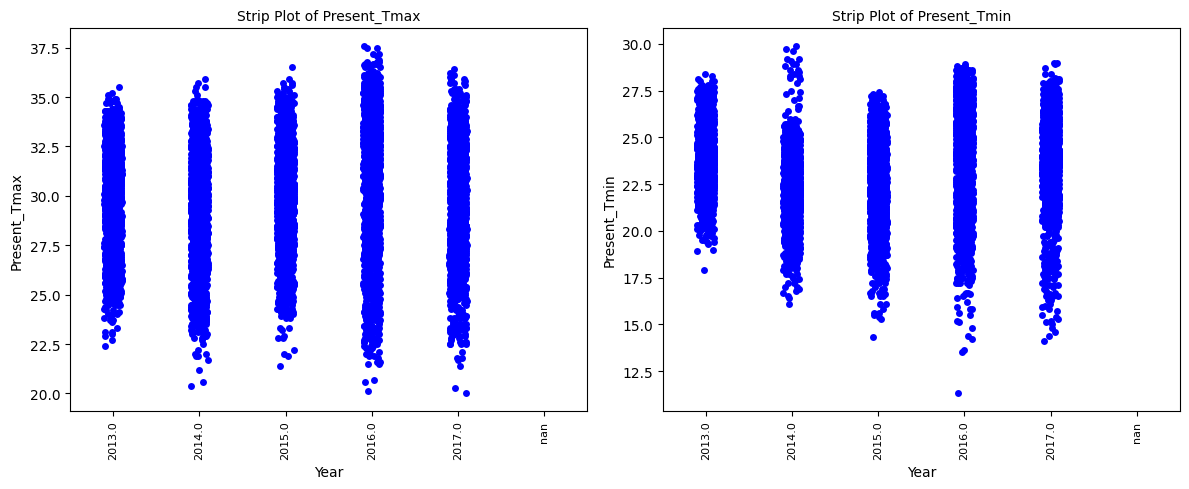

In [19]:
plt.figure(figsize=(12,5))
for i in range(len(col1)):
    plt.subplot(1,2,i+1)
    sns.stripplot(x=data['Year'],y=data[col1[i]],color="blue")
    plt.title(f"Strip Plot of {col1[i]}",fontsize=10)
    plt.xticks(rotation=90,fontsize=8)
    plt.tight_layout()

Stripplot - a single axis scatter plot is used to visualize the distribution of Present_Tmax and Present_Tmin over the Years.
- 2016 has the maximum distribution of data for 
  Present_Tmax (22-36) and Present_Tmin(20-27)

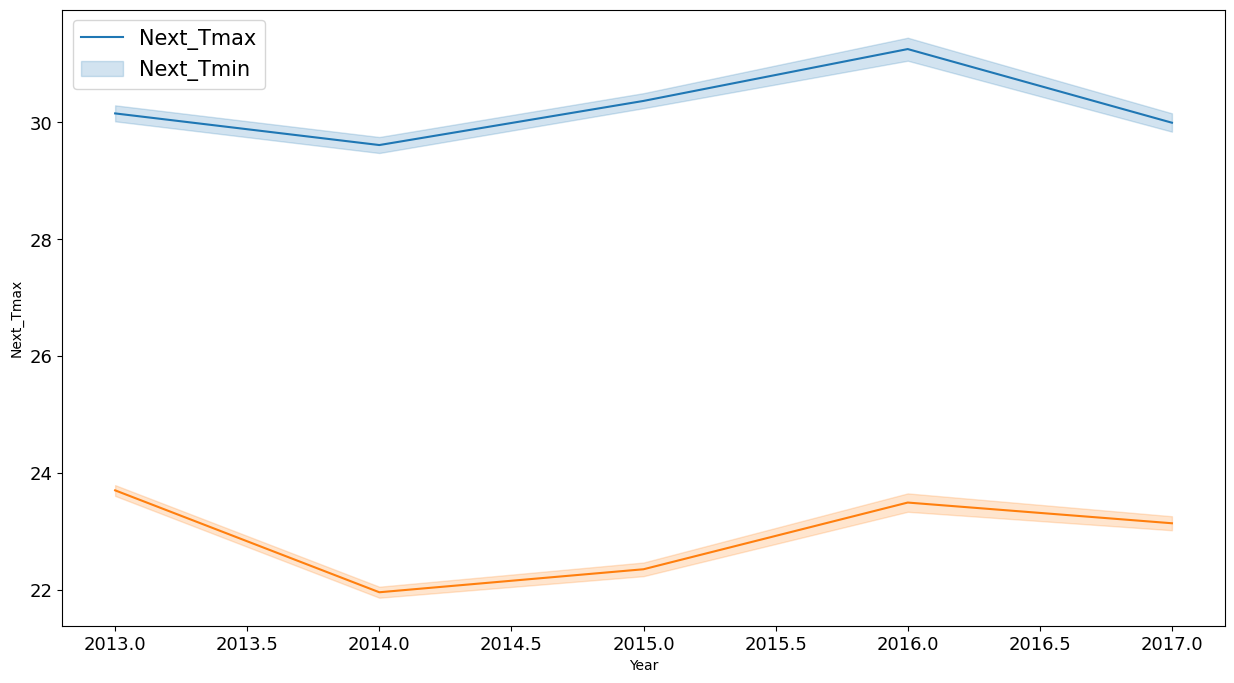

In [20]:
plt.figure(figsize=(15,8))
sns.lineplot(x=data['Year'], y=data['Next_Tmax'])
sns.lineplot(x=data['Year'], y=data['Next_Tmin'])
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.legend(['Next_Tmax','Next_Tmin'], fontsize=15)
plt.show()
                                    

- Maximum temperature was recorded in 2016 ~36.
- Minimum temperature was recorded in 2014 ~22.

# Correlation Matrix
The corr() method calculates the relationship between each column in your data set and builds a Correlation Matrix. The Correlation coeff is mentioned along.

<Axes: >

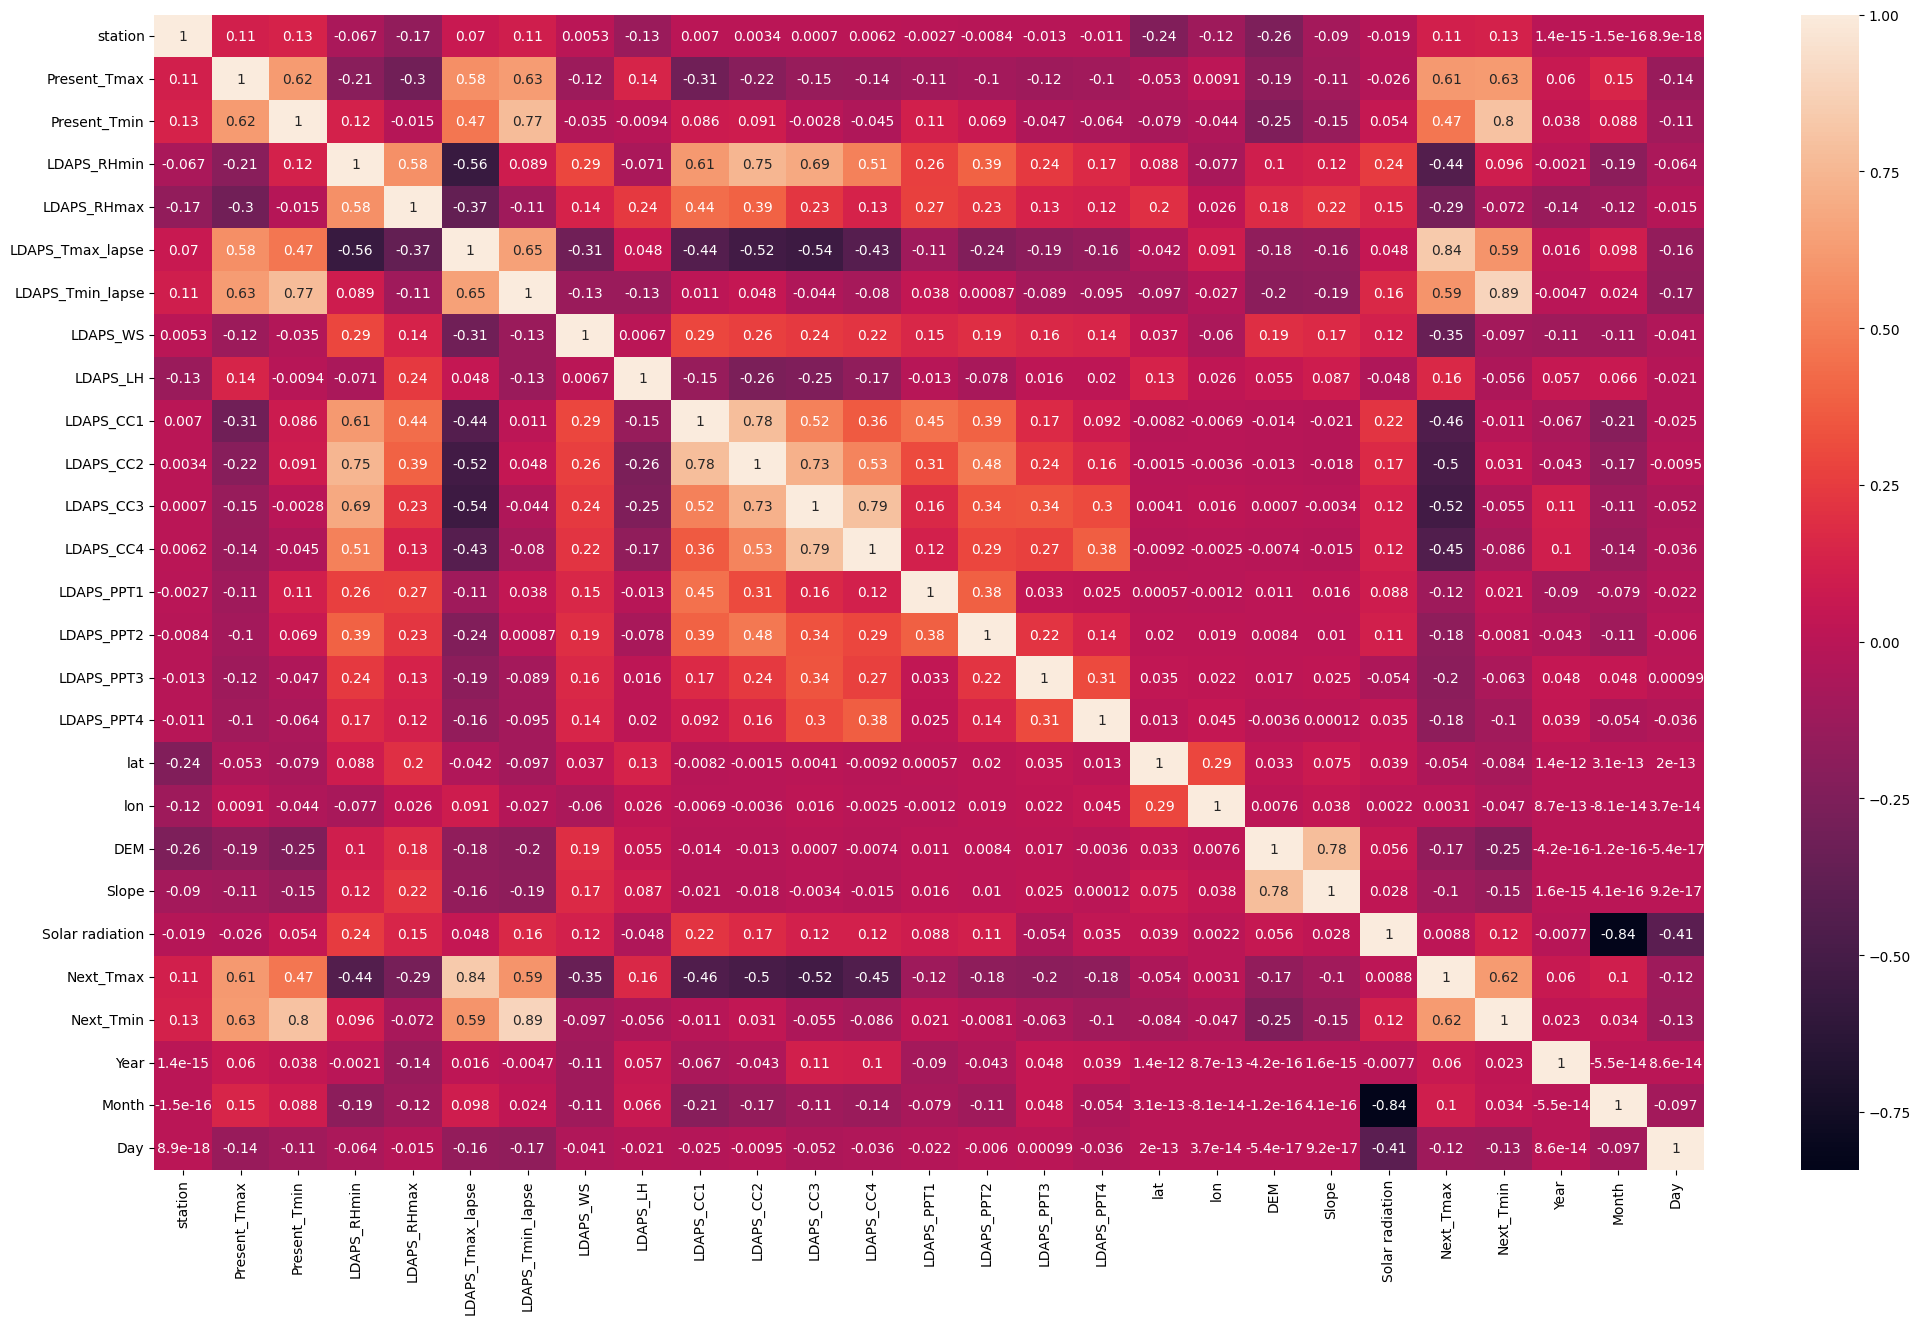

In [21]:
cor = data.corr() 
plt.figure(figsize=(25,15))
sns.heatmap(cor,annot=True)

- Present_Tmax and Present_Tmin impacts Next_temperature more (highly +ve)
- LDAPS lapse also show positive correlation(around 0.6)
- cloud cover (CC) having very high negative corelation 
- precipitation (PPT) has -ve corelation
- solar radiation is almost having no effect on temp
- demographic (DEM) and geographic (Lat & Lon) features also have negative corelation

# Preprocessing
- Either fill the NA values or drop them.
- Divide the dataset into test and train set

In [22]:
def preprocessing(df):
    df=df.copy()
    for column in ['Present_Tmax','Present_Tmin','LDAPS_RHmin','LDAPS_RHmax','LDAPS_Tmax_lapse','LDAPS_Tmin_lapse','LDAPS_WS','LDAPS_LH','LDAPS_CC1','LDAPS_CC2','LDAPS_CC3','LDAPS_CC4','LDAPS_PPT1','LDAPS_PPT2','LDAPS_PPT3','LDAPS_PPT4','DEM','Slope','Solar radiation','Next_Tmax','Next_Tmin']:
        df[column]=df[column].fillna(df[column].mean())
    for column in ['Year','Month','Day','station']:
        df[column]=df[column].fillna(df[column].mode()[0])
        
    X = df.drop(['Next_Tmax','Next_Tmin'],axis=1)
    y= df[['Next_Tmax','Next_Tmin']]
              #data['Next_Tmax'] -- would select exactly one column and gives it in the form of series.
              #data[['Next_Tmax']] -- would slice the dataframe and returns a sub-dataframe with only one column
    return X,y

In [23]:
X,y = preprocessing(data)

In [24]:
y

,Next_Tmax,Next_Tmin
0,29.1,21.2
1,30.5,22.5
2,31.1,23.9
3,31.7,24.3
4,31.2,22.5
...,...,...
7747,28.3,18.1
7748,28.6,18.8
7749,27.8,17.4
7750,17.4,11.3


# Feature Scaling / Normalization
- Standard Scaler method is used for Scaling down the values

In [25]:
scaler=StandardScaler()
X_new=scaler.fit_transform(X)
X_new=pd.DataFrame(X_new,columns=X.columns)
X_new

,station,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,LDAPS_CC1,...,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Year,Month,Day
0,-1.663292,-0.361326,-0.759529,0.102515,0.383078,-0.524889,-0.216663,-0.128382,0.206966,-0.516243,...,-0.240636,-0.224453,1.189286,-0.005000,2.772243,1.115004,1.517935,-1.413666,-2.767613,1.570951
1,-1.524648,0.721084,-0.676296,-0.308027,0.311586,0.080895,0.223848,-0.646994,-0.314841,-0.548557,...,-0.240636,-0.224453,1.189286,0.511177,-0.315157,-0.542158,1.229950,-1.413666,-2.767613,1.570951
2,-1.386005,0.619608,0.031188,-0.552814,-0.614982,0.162936,0.451210,-0.441604,-1.249283,-0.610450,...,-0.240636,-0.224453,0.653021,0.838510,-0.526218,-0.723133,1.216534,-1.413666,-2.767613,1.570951
3,-1.247362,0.754909,0.072805,0.101426,1.133054,0.031092,-0.079874,-0.666247,0.095997,-0.583539,...,-0.240636,-0.224453,1.991696,0.385280,-0.297588,0.932424,1.201176,-1.413666,-2.767613,1.570951
4,-1.108718,0.551957,-0.551446,-0.040098,0.248765,-0.170325,-0.011187,-0.627154,1.354409,-0.832287,...,-0.240636,-0.224453,0.118743,1.807917,-0.494322,-0.548433,1.207205,-1.413666,-2.767613,1.570951
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7747,1.386863,-2.187892,-2.549048,-2.056591,-1.328126,-1.112066,-2.029679,-0.436683,0.284622,-1.297018,...,-0.240636,-0.224453,-0.149390,-1.263971,-0.852681,-0.803915,-2.093040,1.414396,1.003950,1.570951
7748,1.525507,-2.187892,-2.299348,-2.241619,-1.548184,-0.887662,-2.047744,-0.255421,-0.454749,-1.274658,...,-0.240636,-0.224453,-0.417522,-1.037356,-0.821213,-0.755095,-2.104553,1.414396,1.003950,1.570951
7749,1.664150,-2.221718,-2.424198,-2.317504,-1.555342,-0.570780,-2.137962,0.088072,-1.591397,-1.224577,...,-0.240636,-0.224453,-0.417522,-0.269384,-0.779043,-0.719338,-2.074325,1.414396,1.003950,1.570951
7750,-1.663292,-3.304127,-4.962817,-2.532517,-4.113443,-4.087857,-3.959146,-1.939757,-2.267499,-1.412018,...,-0.240636,-0.224453,-1.758184,-2.082302,-0.911963,-0.845455,-2.358212,-1.413666,-0.881831,1.570951


# Train-Test Split

- X_train: Dataset that model has to learn from
- y_train: W.r.t to X_train, the model learns that y_train are the values predicted

- X_test: Testing dataset given to model for prediction
- y_test: Values predicted by the model against X_test dataset will be comapred with      y_test to check accuracy of prediction 

In [26]:
X_train,X_test,y_train,y_test = train_test_split(X_new,y,test_size=0.3,random_state=42)

- X_new(70%) => X_train
- X_new(30%) => X_test
- y(70%) => y_train
- y(30%) => y_test

In [27]:
#y_train #5426 rows (70%)
#y_test #2326 rows (30%)
#X_new  #7752 rows (Total)

# Regression Models

In [28]:
models={
    "ExtraTreesRegressor":ExtraTreesRegressor(),
    "RandomForestRegressor":RandomForestRegressor(),
    "LinearRegression":LinearRegression(),
    "DecisionTreeRegressor":DecisionTreeRegressor(),
    "Lasso":Lasso()
}
etr=["ExtraTreesRegressor",]
rf=["RandomForestRegressor",]
lr=["LinearRegression",]
dtr=["DecisionTreeRegressor",]
ls=["Lasso"]

# Just model names that will be using for comparison

# 1) ExtraTreesRegressor

In [29]:
ETR = ExtraTreesRegressor()
ETR.fit(X_train,y_train)
y_pred_ETR = ETR.predict(X_test)

In [30]:
y_pred_ETR

array([[28.501     , 20.431     ],
       [35.03274887, 27.2173222 ],
       [25.388     , 21.195     ],
       ...,
       [31.511     , 25.038     ],
       [27.706     , 22.206     ],
       [29.416     , 22.795     ]])

In [31]:
y_test

,Next_Tmax,Next_Tmin
5082,28.3,20.3
5597,35.9,27.5
1623,25.3,21.2
6821,35.9,25.2
3892,33.4,26.0
...,...,...
2638,27.1,21.7
6409,29.7,22.6
3939,32.3,25.0
584,26.8,22.1


In [32]:
score = ETR.score(X_test,y_test)
accuracy_ETR = score * 100
accuracy_ETR

92.09375940373309

# Metrics
- MSE : Mean Squared Error
A metric that tells us the average squared difference between the predicted values and the actual values in a dataset. The lower the MSE, the better a model fits a dataset.

- RMSE: Root Mean Squared Error
A metric that tells us the square root of the average squared difference between the predicted values and the actual values in a dataset. The lower the RMSE, the better a model fits a dataset.


In [33]:
from sklearn.metrics import mean_squared_error as mse
mse_ETR=mse(y_test,y_pred_ETR)
mse_ETR


0.6237291117259317

In [34]:
rmse_ETR=mse(y_test,y_pred_ETR) ** 1/2 # Root mean square error
rmse_ETR

0.31186455586296585

In [35]:
#plt.scatter(y_test,y_pred_ETR)

# 2) RandomForestRegressor

In [36]:
RF = RandomForestRegressor()
RF.fit(X_train,y_train)
y_pred_RF = RF.predict(X_test)
y_pred_RF

array([[28.451     , 20.341     ],
       [34.71849773, 27.0396444 ],
       [25.228     , 21.17      ],
       ...,
       [31.668     , 25.12      ],
       [27.55874887, 22.1373222 ],
       [29.5       , 22.759     ]])

In [37]:
score = RF.score(X_test,y_test)
accuracy_RF = score * 100 #Accuracy

In [38]:
mse_RF=mse(y_test,y_pred_RF) # Mean square error
rmse_RF=mse(y_test,y_pred_RF) ** 1/2 # Root mean square error
accuracy_RF,mse_RF,rmse_RF

(89.8655081545319, 0.8041404635516582, 0.4020702317758291)

In [39]:
#plt.scatter(y_test,y_pred_RF)

# 3) LinearRegression

In [40]:
LR = LinearRegression()
LR.fit(X_train,y_train)
y_pred_LR=LR.predict(X_test)

In [41]:
score = LR.score(X_test,y_test)
accuracy_LR = score * 100

In [42]:
mse_LR=mse(y_test,y_pred_LR) # Mean square error
rmse_LR=mse(y_test,y_pred_LR) ** 1/2 # Root mean square error
accuracy_LR,mse_LR,rmse_LR

(80.46978030095812, 1.6129438092238675, 0.8064719046119337)

In [43]:
#plt.scatter(y_test,y_pred_LR)

# 4) DecisionTreeRegressor

In [44]:
DTR=DecisionTreeRegressor()
DTR.fit(X_train,y_train)
y_pred_DTR=DTR.predict(X_test)

In [45]:
score = DTR.score(X_test,y_test)
accuracy_DTR = score * 100
accuracy_DTR

76.10395563441689

In [46]:
mse_DTR=mse(y_test,y_pred_DTR) # Mean square error
rmse_DTR=mse(y_test,y_pred_DTR) ** 1/2 # Root mean square error
accuracy_DTR,mse_DTR,rmse_DTR

(76.10395563441689, 1.9271286937703294, 0.9635643468851647)

In [47]:
#plt.scatter(y_test,y_pred_DTR)

# 5) Lasso

In [48]:
LS=Lasso()
LS.fit(X_train,y_train)
y_pred_LS=LS.predict(X_test)

In [49]:
score = LS.score(X_test,y_test)
accuracy_LS = score * 100
accuracy_LS

60.467311264830784

In [50]:
mse_LS=mse(y_test,y_pred_LS) # Mean square error
rmse_LS=mse(y_test,y_pred_LS) ** 1/2 # Root mean square error
accuracy_LS,mse_LS,rmse_LS

(60.467311264830784, 3.195578067846775, 1.5977890339233876)

In [51]:
#plt.scatter(y_test,y_pred_LS)